In [2]:
from LatLongUTMconversion import LLtoUTM, UTMtoLL
import matplotlib
import matplotlib.pyplot as plt
import math



In [48]:
# Constants
#Original White line measurements
lane1_sp = [41.3907390,-73.9533992]
#lane1_sp = [41.3908234,-73.9533321] #not sp but tape measure center
lane1_mp = [41.3911455,-73.9531820]
lane1_ep = [41.3915678,-73.9529756]
lane2_sp = [41.3906740,-73.9532092]
lane2_mp = [41.3910964,-73.9530032]
lane2_ep = [41.3915340,-73.9528435]

lane1_sp = [41.3907016,-73.9533907]
lane1_mp = [41.3911455,-73.9531820]
lane1_ep = [41.3915598,-73.9529776]
lane2_sp = [41.3906740,-73.9532092]
lane2_mp = [41.3910964,-73.9530032]
lane2_ep = [41.3915340,-73.9528435]


altitude = 20 # in meters
cam_mount_angle = 60 # in degrees
cam_fov = 60.6 # in degrees



In [49]:
angle = (90 - cam_mount_angle + cam_fov /2)
angle_rad = (angle*math.pi/180)
dist = altitude * math.tan(0.25 * angle_rad) # 0.25 is to get 1/4th of fov on road. 
print("The offset distance should be: ",dist, "m (FOV:",cam_fov, "deg.,", angle,"deg.)")

The offset distance should be:  5.387053283675236 m (FOV: 60.6 deg., 60.3 deg.)


In [50]:
lane1_eastings = []
lane2_eastings = []
lane1_northings = []
lane2_northings = []
(zone,easting,northing)=LLtoUTM(23, lane1_sp[0], lane1_sp[1])
lane1_eastings.append(easting)
lane1_northings.append(northing)
(zone,easting,northing)=LLtoUTM(23, lane1_mp[0], lane1_mp[1])
lane1_eastings.append(easting)
lane1_northings.append(northing)
(zone,easting,northing)=LLtoUTM(23, lane1_ep[0], lane1_ep[1])
lane1_eastings.append(easting)
lane1_northings.append(northing)
(zone,easting,northing)=LLtoUTM(23, lane2_sp[0], lane2_sp[1])
lane2_eastings.append(easting)
lane2_northings.append(northing)
(zone,easting,northing)=LLtoUTM(23, lane2_mp[0], lane2_mp[1])
lane2_eastings.append(easting)
lane2_northings.append(northing)
(zone,easting,northing)=LLtoUTM(23, lane2_ep[0], lane2_ep[1])
lane2_eastings.append(easting)
lane2_northings.append(northing)
print(zone)

18T


In [51]:
def get_offset_coords(x, y, slope, dist):
    new_x = x + dist*math.sqrt( 1/(1+math.pow(slope,2)) )
    new_y = y + slope*dist*math.sqrt( 1/(1+math.pow(slope,2)) )
    return(new_x,new_y)

In [52]:
lane1_slope = (lane1_northings[0] - lane1_northings[2]) / (lane1_eastings[0] - lane1_eastings[2])
line_slope = -1/lane1_slope
print(lane1_slope, (-1/lane1_slope))
yaw = math.atan(lane1_slope)
print("Yaw: " , yaw*180/math.pi)


pnt_x = lane1_eastings[0]
pnt_y = lane1_northings[0]
pnt_1 = get_offset_coords(lane1_eastings[0],lane1_northings[0],line_slope,dist)
pnt_2 = get_offset_coords(lane1_eastings[0],lane1_northings[0],line_slope,(-1*dist))
pnt_3 = get_offset_coords(lane1_eastings[2],lane1_northings[2],line_slope,dist)
pnt_4 = get_offset_coords(lane1_eastings[2],lane1_northings[2],line_slope,(-1*dist))

ll_pt1 = UTMtoLL(23, pnt_1[1], pnt_1[0], '18T')
ll_pt2 = UTMtoLL(23, pnt_2[1], pnt_2[0], '18T')
ll_pt3 = UTMtoLL(23, pnt_3[1], pnt_3[0], '18T')
ll_pt4 = UTMtoLL(23, pnt_4[1], pnt_4[0], '18T')

print("wp1:",ll_pt1[0],ll_pt1[1])
print("wp2:",ll_pt3[0],ll_pt3[1])
print("wp3 ",ll_pt4[0],ll_pt4[1])
print("wp4 ",ll_pt2[0],ll_pt2[1])

2.866313504418538 -0.34888018999263676
Yaw:  70.76713220051502
wp1:  41.3906851 -73.9533301
wp2:  41.3915433 -73.952917
wp3  41.3915763 -73.9530382
wp4  41.3907181 -73.9534513


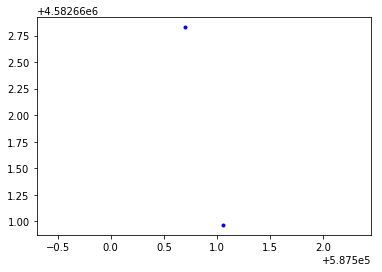

In [47]:
pt_ll = (41.3907400, -73.9533847)
or_ll = (41.3907232, -73.9533806)
(zone,easting1,northing1)=LLtoUTM(23, pt_ll[0], pt_ll[1])

(zone,easting0,northing0)=LLtoUTM(23, or_ll[0], or_ll[1])
plt.figure(1) 
plt.axis('equal')
#plt.plot(lane2_eastings,lane2_northings, 'r.') 
plt.plot(easting1,northing1, 'b.')
plt.plot(easting0,northing0, 'b.')


In [ ]:
# at 10 meters
# 2.812883718220223 -0.35550705261030957
# Yaw:  70.42934132856371
# wp1:  41.3907148 -73.9533504
# wp2:  41.3907316 -73.9534108
# wp3:  41.3915595 -73.9529363
# wp4:  41.3915763 -73.9529967

# at 20 meters
# 2.812883718220223 -0.35550705261030957
# Yaw:  70.42934132856371
# wp1:  41.3907064 -73.9533202
# wp2:  41.3915511 -73.9529061
# wp3  41.3915847 -73.9530269
# wp4  41.39074 -73.953441

In [37]:
lane1_slope = (lane1_northings[0] - lane1_northings[2]) / (lane1_eastings[0] - lane1_eastings[2])
line_slope = -1/lane1_slope
print(lane1_slope, (-1/lane1_slope))
yaw = math.atan(lane1_slope)
print("Yaw: " , yaw*180/math.pi)


pnt_x = lane1_eastings[0]
pnt_y = lane1_northings[0]
pnt_1 = get_offset_coords(lane1_eastings[0],lane1_northings[0],line_slope,dist)
pnt_2 = get_offset_coords(lane1_eastings[0],lane1_northings[0],line_slope,(-1*dist))
pnt_3 = get_offset_coords(lane1_eastings[2],lane1_northings[2],line_slope,dist)
pnt_4 = get_offset_coords(lane1_eastings[2],lane1_northings[2],line_slope,(-1*dist))

ll_pt1 = UTMtoLL(23, pnt_1[1], pnt_1[0], '18T')
ll_pt2 = UTMtoLL(23, pnt_2[1], pnt_2[0], '18T')
ll_pt3 = UTMtoLL(23, pnt_3[1], pnt_3[0], '18T')
ll_pt4 = UTMtoLL(23, pnt_4[1], pnt_4[0], '18T')

print("wp1: ",ll_pt1[0],ll_pt1[1])
print("wp2: ",ll_pt2[0],ll_pt2[1])
print("wp3: ",ll_pt3[0],ll_pt3[1])
print("wp4: ",ll_pt4[0],ll_pt4[1])

2.812883718220223 -0.35550705261030957
Yaw:  70.42934132856371
wp1:  41.3907148 -73.9533504
wp2:  41.3907316 -73.9534108
wp3:  41.3915595 -73.9529363
wp4:  41.3915763 -73.9529967


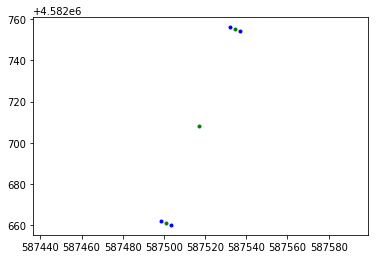

In [38]:
plt.figure(1) 
plt.axis('equal')
plt.plot(lane1_eastings,lane1_northings, 'g.')
#plt.plot(lane2_eastings,lane2_northings, 'r.') 
plt.plot(pnt_1[0],pnt_1[1], 'b.')
plt.plot(pnt_2[0],pnt_2[1], 'b.')
plt.plot(pnt_3[0],pnt_3[1], 'b.')
plt.plot(pnt_4[0],pnt_4[1], 'b.')
plt.show()